In [30]:
import tensorflow as tf

In [31]:
dataset = tf.data.Dataset.load("dataset")

dataet = dataset.batch(32).prefetch(1)


In [32]:
"0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922"

'0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922'

In [33]:
metrics = tf.keras.metrics.MeanIoU(num_classes=4)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(4,kernel_size=(3,3),strides=(1,1),padding="same")
])


model.compile(optimizer="adam",loss="mse",metrics=[metrics])

model.fit(dataet, epochs=100,callbacks=[early_stop])


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 0.0654 - mean_io_u_2: 0.6014
Epoch 2/100
 1/28 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0227 - mean_io_u_2: 1.0000

/home/lucas/Área de Trabalho/curso_tensorflow/venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_io_u_2
  current = self.get_monitor_value(logs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0194 - mean_io_u_2: 0.6032
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0156 - mean_io_u_2: 1.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0132 - mean_io_u_2: 1.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0125 - mean_io_u_2: 1.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0123 - mean_io_u_2: 1.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0127 - mean_io_u_2: 1.0000
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0119 - mean_io_u_2: 1.0000
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0112 - mean_io_u_2: 1.0000
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0109 - mean_io_u_2: 1.0000
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0109 - mean_io_u_2: 1.0000
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0108 - mean_io_u_2: 1.0000
Epoch 13/100
28/28 

In [34]:
model.save("model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


[[[[0.4841833  0.494463   0.08447523 0.12208881]]]]


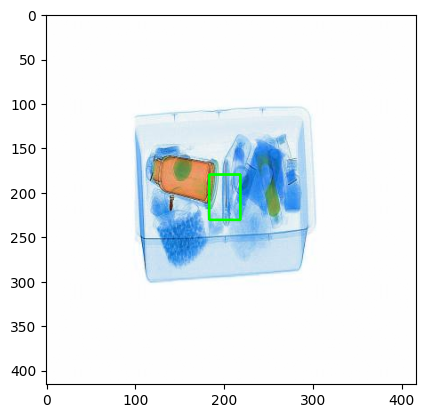

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("imagem_teste.jpg")

image = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)
print(predictions)

h_image,w_image= image.shape[1:3]

x,y,w,h = predictions[0][0][0]

x1 = int((x - w / 2)* w_image)
y1 = int((y - h / 2)* h_image)
x2 = int((x + w / 2)* w_image)
y2 = int((y + h / 2)* h_image)



cv2.rectangle(image[0], (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(image[0])